In [1]:
from tensorflow.keras.backend import shape
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np

import keras
import keras.utils
from keras import utils as np_utils

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
#  ConvLSTM
from keras.layers import Dense, Activation, Input, LSTM, Bidirectional, Dropout
from keras.models import Sequential, Model
from keras.layers import Conv1DTranspose, Conv1D, MaxPooling1D

from tensorflow.python.client import device_lib

In [2]:
data = pd.read_csv('/content/Dataset1.csv')



data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
print(data.isnull().sum())

#print(data_full.info())
print(data.shape)

#print(data.isnull().sum())
#print(data_full['pi'].describe())

#print(data_full['flw'].isnull())
#print(data.describe())
#print(data_full['class'] < 0.0)

y = data["isFake"]
X = data.drop("isFake", axis=1)

userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
isFake                 0
dtype: int64
(1165, 9)


In [3]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(X)

x = x.reshape(1165, 1, 8)

X_train, X_test, y_train , y_test = train_test_split(x , y, test_size=0.3 , random_state = 72)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)


model = models.Sequential()

model.add(LSTM(512,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))


model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(64 , kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))
# FIT / TRAIN model

model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=25, epochs=100,validation_data=(X_test,y_test) )

X_train:  (815, 1, 8)
X_test:  (350, 1, 8)
y_train:  (815,)
y_test:  (350,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7920 - loss: 0.8217 - val_accuracy: 0.8400 - val_loss: 0.5947
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8192 - loss: 0.6081 - val_accuracy: 0.8400 - val_loss: 0.4077
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8628 - loss: 0.4018 - val_accuracy: 0.9343 - val_loss: 0.2756
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9216 - loss: 0.2948 - val_accuracy: 0.9286 - val_loss: 0.2573
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9247 - loss: 0.2636 - val_accuracy: 0.9486 - val_loss: 0.1994
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9372 - loss: 0.2257 - val_accuracy: 0.9314 - val_loss: 0.2162
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9424 - loss: 0.2156 - val_accuracy: 0.9514 - val_loss: 0.1763
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9236 - loss: 0.2163 - val_accuracy: 0

In [4]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9577 - loss: 0.2033
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.12009371817111969, 0.9685714244842529]


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [5]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
[0.84 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.8  0.   0.   1.   0.   1.   0.   0.   0.   0.   0.   1.   0.
 1.   0.   0.   0.   0.   0.   0.   0.   0.17 0.   0.   1.   0.   0.
 0.   0.   0.   0.08 1.   0.   0.   0.   1.   0.   0.   0.   0.   1.
 0.   0.   0.   0.51 0.   0.   0.77 0.   0.01 0.   0.   0.   0.   0.04
 0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.31 0.39 0.   0.   0.   0.   0.   0.   0.   0.   1.   0.01 0.
 0.   1.   0.   0.   0.6  0.   0.   0.   0.05 0.   0.69 0.   0.   0.
 0.   0.12 1.   0.98 0.89 0.28 0.   0.11 0.01 0.   0.97 0.   0.   0.
 0.   0.85 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.39 0.94
 0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.03 1.   0.
 0.   0.99 0.   0.   0.   0.   0.   0.   0.77 0.   0.   0.   0.   0.
 1.   0.   0.   0.   0.   0.   0.   0.36 0.91 1.   1.   0.02 0.   0.
 0.04 0.   0.   0.   0.   0.   1.   0.   1.   0.   0.04 0. 

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

print('F1 score: %f' % f1)
# Precision: tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)


Accuracy: 0.968571
Recall: 0.910714
F1 score: 0.902655
Precision: 0.894737


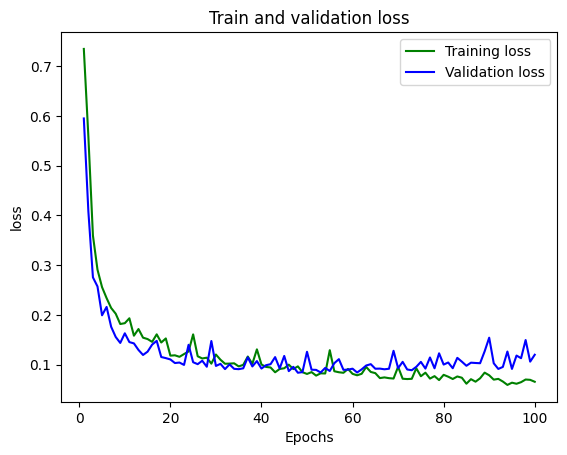

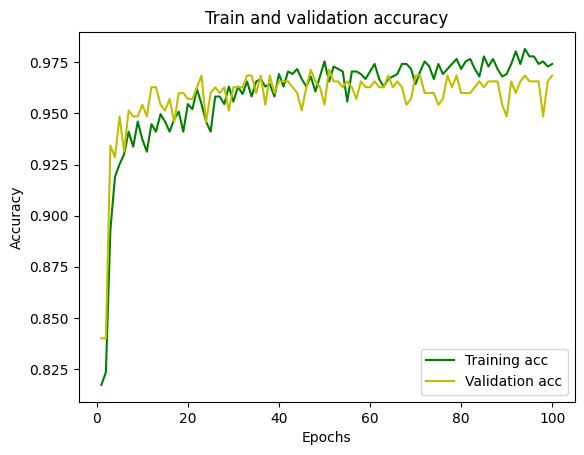

In [7]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+ 1)
plt.plot(epochs ,loss,'g',label='Training loss')
plt.plot(epochs ,val_loss,'b',label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs ,acc,'g',label='Training acc')
plt.plot(epochs ,val_acc,'y',label='Validation acc')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Model Evaluation
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Save the Model
model.save("lstm_model.h5")
print("Model saved successfully as lstm_model.h5")

# Load the Model
loaded_model = tf.keras.models.load_model("lstm_model.h5")
print("Model loaded successfully")

# Verify Model Performance After Loading
loaded_results = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model - Test Loss: {loaded_results[0]:.4f}, Test Accuracy: {loaded_results[1]:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Model saved successfully as lstm_model.h5


Model loaded successfully
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9577 - loss: 0.2033
Loaded Model - Test Loss: 0.1201, Test Accuracy: 0.9686


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load the trained model
loaded_model = tf.keras.models.load_model("lstm_model.h5")

# Function to take custom input and make predictions
def predict_custom_input(custom_data):
    # Ensure the input data has the correct format
    if len(custom_data) != 8:
        raise ValueError("Custom input must contain exactly 8 feature values.")

    # Convert to NumPy array and reshape
    custom_data = np.array(custom_data).reshape(1, -1)

    # Normalize the input using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)  # Ensure the scaler is fitted on the original dataset
    custom_data_scaled = scaler.transform(custom_data)

    # Reshape for LSTM input (samples, timesteps, features)
    custom_data_scaled = custom_data_scaled.reshape(1, 1, 8)

    # Make prediction
    prediction_prob = loaded_model.predict(custom_data_scaled)[0][0]  # Extract scalar value

    # Convert probability to binary class (0 or 1)
    prediction_class = 1 if prediction_prob > 0.5 else 0

    # Output result
    print(f"Prediction: {'Fake' if prediction_class == 1 else 'Not Fake'}")
    print(f"Confidence Score: {float(prediction_prob):.4f}")  # Convert to float explicitly

    return prediction_class, float(prediction_prob)

# Example Custom Input (Modify this as needed)
custom_input = [5000,2000,150,300,1,0,1,12]  # Replace with real input values
predict_custom_input(custom_input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
Prediction: Not Fake
Confidence Score: 0.0000


<ipython-input-15-f93b0624502b>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Confidence Score: {float(prediction_prob):.4f}")  # Convert to float explicitly
<ipython-input-15-f93b0624502b>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return prediction_class, float(prediction_prob)


(0, 0.0)